# Installation des librairies 

In [1]:
!pip install  visualkeras
!pip3 install ann_visualizer
!pip install graphviz

     |████████████████████████████████| 992 kB 26.4 MB/s 
  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=de7622fb85201ec85c4057fb93d63568d2e4acaf1203ad80c6169f7b0a5a52da
  Stored in directory: /root/.cache/pip/wheels/1b/fc/58/2ab1c3b30350105929308becddda4fb59b1358e54f985e1f4a
Successfully built ann-visualizer


# Chargement des librairies

In [2]:
import numpy as np 
import pandas as pd 
import random
np.random.seed(42)

from sklearn.metrics import classification_report, confusion_matrix
import sklearn.model_selection

import keras
from keras import layers

import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.applications import EfficientNetB0

import os
from glob import glob

import matplotlib.pyplot as plt 
import seaborn as sns
import visualkeras

from PIL import Image

import time
from datetime import datetime


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Expolation des donnees

In [4]:
dir = '/content/drive/MyDrive/AI/A62/input/chest_xray/chest_xray'
test_dir  = os.path.join(dir,'test') 
train_dir = os.path.join(dir,'train') 
val_dir   = os.path.join(dir,'val') 

## Nombre des images par class

In [5]:
NumClass = len(glob(train_dir+"/*")) 
print("Number of Classes: ",NumClass)

Number of Classes:  2


In [6]:
categ = ['NORMAL', 'PNEUMONIA']

In [7]:
number_classes_train = {categ[0]: len(os.listdir((os.path.join(train_dir,categ[0])))),
categ[1]: len(os.listdir((os.path.join(train_dir,categ[1]))))}
number_classes_test = {categ[0]: len(os.listdir(os.path.join(test_dir,categ[0]))),
categ[1]: len(os.listdir(os.path.join(test_dir,categ[1])))}
number_classes_val = {categ[0]: len(os.listdir(os.path.join(val_dir,categ[0]))),
categ[1]: len(os.listdir(os.path.join(val_dir,categ[1])))}

In [8]:
print('Train      ',number_classes_train)
print('Test       ',number_classes_test)
print('Validation ',number_classes_val)

Train       {'NORMAL': 1341, 'PNEUMONIA': 3875}
Test        {'NORMAL': 234, 'PNEUMONIA': 390}
Validation  {'NORMAL': 8, 'PNEUMONIA': 8}


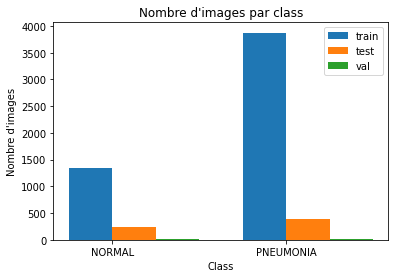

In [9]:
N = 2
r = np.arange(N) 
width=0.25
plt.bar(r, number_classes_train.values(), width = .25,label='train');
plt.bar(r+width, number_classes_test.values(), width = .25,label='test');
plt.bar(r+2*width, number_classes_val.values(), width = .25,label='val');
plt.title("Nombre d'images par class");
plt.xlabel('Class');
plt.ylabel("Nombre d'images");
plt.xticks(r + width/2,['NORMAL', 'PNEUMONIA'])
plt.legend()
plt.show()


## Affichage des images aleatoires pour train, test et val dans chaque categorie

In [10]:
def listdir_nohidden(path):
    for f in os.listdir(path):
        if not f.startswith('.'):
            yield f

NORMAL


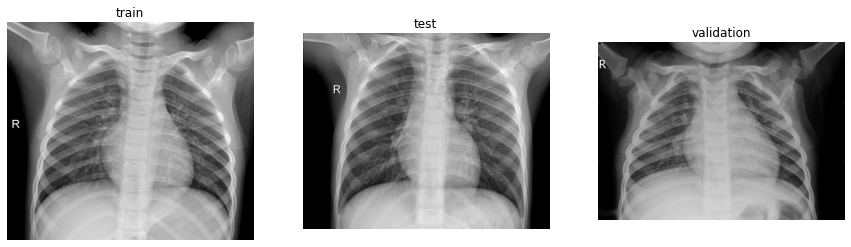

PNEUMONIA


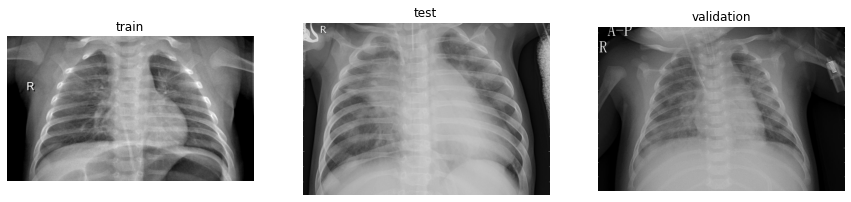

In [11]:
categ = ['NORMAL', 'PNEUMONIA']
dirs =[train_dir,test_dir,val_dir]
titles=['train','test','validation']

for ca in categ:
    plt.figure(figsize=(15,10))
    print(ca)
    i = 0
    for d in dirs:
      path = os.path.join(d,ca)
      files=os.listdir(path)
      img=random.choice(files)
      img_arr =Image.open(os.path.join(path,img)) 
      plt.subplot(1, 3, i + 1)
      plt.imshow(np.array(img_arr),cmap='gray')
      plt.title(titles[i])
      plt.axis('off')
      i=i+1

    plt.show() 

Affichage des images reduits pour voir si on perde beaucoup d'information ou non

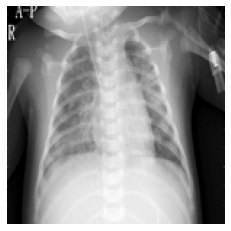

In [12]:
img_size = 150
new_img = img_arr.resize((img_size,img_size))
plt.imshow(new_img,cmap='gray')
plt.axis('off')
plt.show()

## La taille des images originales

In [13]:
categ = ['NORMAL', 'PNEUMONIA']
longeur_train=[]
largeur_train=[]
y_train=[]
longeur_test=[]
largeur_test=[]
y_test=[]
longeur_val=[]
largeur_val=[]
y_val=[]
for ca in categ:
    class_num = categ.index(ca)
    path = os.path.join(train_dir,ca)
    files=list(listdir_nohidden(path))
    for i in os.listdir(path):
        img_arr =Image.open(os.path.join(path,i)) 
        arr = np.array(img_arr)
        y_train.append(class_num)
        largeur_train.append(arr.shape[0])
        longeur_train.append(arr.shape[1])   
    #test   
    path = os.path.join(test_dir,ca)
    files=list(listdir_nohidden(path))
    for i in files:
       img_arr =Image.open(os.path.join(path,i)) 
       arr = np.array(img_arr)
       y_test.append(class_num)
       largeur_test.append(arr.shape[0])
       longeur_test.append(arr.shape[1])   
    #val   
    path = os.path.join(val_dir,ca)
    files=list(listdir_nohidden(path))
    for i in files:
       img_arr =Image.open(os.path.join(path,i)) 
       arr = np.array(img_arr)
       y_val.append(class_num)
       largeur_val.append(arr.shape[0])
       longeur_val.append(arr.shape[1])  
#-----MIN MAX
print('TRAIN')       
print('Longeur min :',min(longeur_train),'Longeur max :',max(longeur_train))    
print('Largeur min :',min(largeur_train),'Largeur max :',max(largeur_train))              

print('TEST')       
print('Longeur min :',min(longeur_test),'Longeur max :',max(longeur_test))    
print('Largeur min :',min(largeur_test),'Largeur max :',max(largeur_test))              

print('VALIDATION')       
print('Longeur min :',min(longeur_val),'Longeur max :',max(longeur_val))    
print('Largeur min :',min(largeur_val),'Largeur max :',max(largeur_val))

TRAIN
Longeur min : 384 Longeur max : 2916
Largeur min : 127 Largeur max : 2663
TEST
Longeur min : 728 Longeur max : 2752
Largeur min : 344 Largeur max : 2713
VALIDATION
Longeur min : 968 Longeur max : 1776
Largeur min : 592 Largeur max : 1416


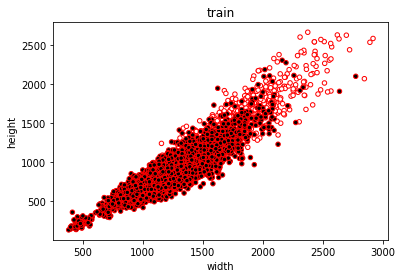

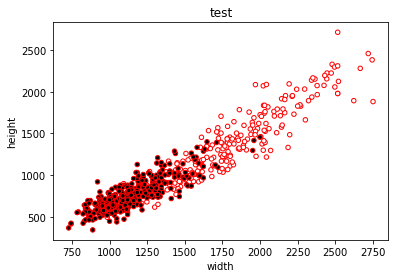

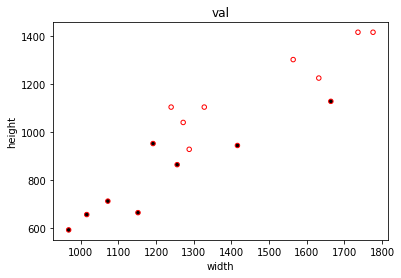

In [14]:
dim_df_train = pd.DataFrame(data=np.column_stack((largeur_train,longeur_train,y_train)), columns=['height', 'width','category'])
dim_df_train.plot.scatter(x='width', y='height',edgecolors='r', c=y_train,title='train');

dim_df_test = pd.DataFrame(data=np.column_stack((largeur_test,longeur_test,y_test)), columns=['height', 'width','category'])
dim_df_test.plot.scatter(x='width', y='height',edgecolors='r', c=y_test,title='test');

dim_df_val = pd.DataFrame(data=np.column_stack((largeur_val,longeur_val,y_val)), columns=['height', 'width','category'])
dim_df_val.plot.scatter(x='width', y='height',edgecolors='r', c=y_val,title='val');

None

# Pre-traitement de donnees


##  Chargement des donnees dans les lists

- La majorite des images sont en mode 'L', mais il y a encore quelques images en mode 'RGB'. Donc, on a converti tous les images en mode 'L' et resize avant les sauvegarder en list 

In [15]:
def create_list(my_list,categ,my_dir):
    img_size = 150
    for ca in categ:
        path = os.path.join(my_dir,ca)
        class_num = categ.index(ca)
        for img in os.listdir(path):
            img_arr =Image.open(os.path.join(path,img)) 
            img_arr1 = img_arr.convert("L")            
            new_im = img_arr1.resize((img_size,img_size))
            new_img = np.asarray(new_im)
            arr = new_img.reshape((img_size, img_size, 1))
            my_list.append([arr,class_num])      
       

In [17]:
train_list = []
test_list = []
val_list = []
create_list(train_list,categ,train_dir)
create_list(test_list,categ,test_dir)
create_list(val_list,categ,val_dir)
print('Taille de donnees de train: ', len(train_list))
print('Taille de donnees de test: ',len(test_list))
print('Taille de donnees de validation: ', len(val_list))

Taille de donnees de train:  5216
Taille de donnees de test:  624
Taille de donnees de validation:  16


## Split les donnees (X - image; y - etiquette)

In [18]:
def split_data(X,y,my_list,img_size):
    for i,j in my_list:
        X.append(i)
        y.append(j)
    X = np.array(X).reshape(-1, img_size, img_size, 1)

In [19]:
X_train = []
y_train = []
X_test = []
y_test = []
X_val = []
y_val = []
split_data(X_train, y_train, train_list, img_size)

In [20]:
split_data(X_test, y_test, test_list, img_size)

In [21]:
split_data(X_val, y_val, val_list, img_size)

In [22]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
X_val = np.asarray(X_val)
y_val = np.asarray(y_val)

In [23]:
# Verification double
print('Donnees de TRAIN')
print('Normal :', np.unique(y_train, return_counts=True)[1][0])
print('Pneumonie :',np.unique(y_train, return_counts=True)[1][1])
print('-----')
print('Donnees de TEST')
print('Normal :', np.unique(y_test, return_counts=True)[1][0])
print('Pneumonie :',np.unique(y_test, return_counts=True)[1][1])
print('-----')
print('Donnees de VALIDATION')
print('Normal :', np.unique(y_val, return_counts=True)[1][0])
print('Pneumonie :',np.unique(y_val, return_counts=True)[1][1])


Donnees de TRAIN
Normal : 1341
Pneumonie : 3875
-----
Donnees de TEST
Normal : 234
Pneumonie : 390
-----
Donnees de VALIDATION
Normal : 8
Pneumonie : 8


## Normalisation des images

In [24]:
X_train = X_train/255.0
X_test = X_test/255.0
X_val = X_val/255.0

# Developpement du Modele

In [25]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights=True)

In [26]:
print(X_train.shape)

(5216, 150, 150, 1)


### Definition du modele
- On va utiliser le modele ResNet pre-entraine.
- Optimisateur 'Adam'
- Fonction loss 'binary_crossentropy'
- Utilisation de 'callbacks' pour debarasser de overfit

In [27]:
inputs = keras.Input(shape=(img_size, img_size, 1))

# data augmentation
x = tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal')(inputs)
x = tf.keras.layers.experimental.preprocessing.RandomTranslation(height_factor=0.20, width_factor=0.20)(x)
x = tf.keras.layers.experimental.preprocessing.RandomRotation(factor=0.09)(x)


def res_net_block(input_data, filters, conv_size):
    x = layers.Conv2D(filters, conv_size, activation='relu', padding='same')(input_data)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(filters, conv_size, activation=None, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Add()([x, input_data])
    x = layers.Activation('relu')(x)
    return x

# model itself
x = keras.layers.Conv2D(filters=64, kernel_size=3, input_shape=(img_size, img_size, 1), padding='same', activation="relu")(x)
x = keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=(64, 64, 1), padding='same', activation="relu")(x)
num_res_net_blocks = 18
for i in range(num_res_net_blocks):
    x = res_net_block(x, 32, 5)
x = layers.Dropout(0.5)(x)
for i in range(num_res_net_blocks):
    x = res_net_block(x, 32, 5)
x = layers.Conv2D(25, 3, activation='relu')(x)
x = layers.GlobalMaxPooling2D()(x)
x = keras.layers.Dense(256, activation='sigmoid')(x)
x = keras.layers.Dense(32, activation='sigmoid')(x)

outputs = layers.Dense(1, activation='sigmoid')(x)

model = keras.Model(inputs, outputs)

In [28]:
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [29]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 1  0           []                               
                                )]                                                                
                                                                                                  
 random_flip (RandomFlip)       (None, 150, 150, 1)  0           ['input_1[0][0]']                
                                                                                                  
 random_translation (RandomTran  (None, 150, 150, 1)  0          ['random_flip[0][0]']            
 slation)                                                                                         
                                                                                              

## Visualization de notre modele

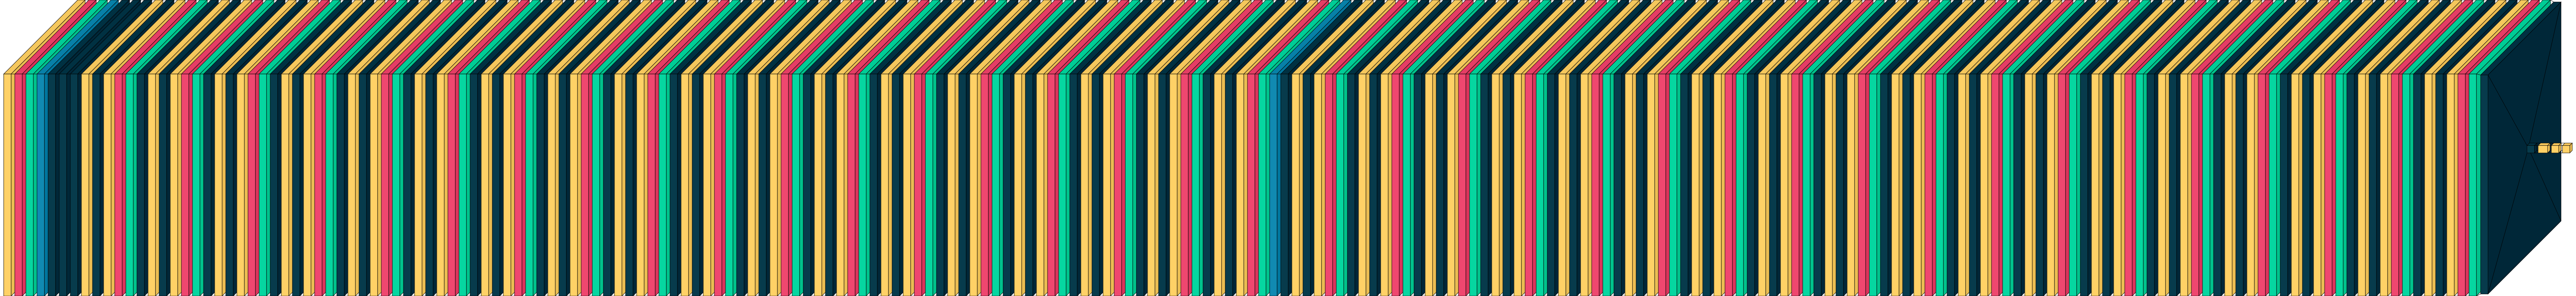

In [30]:
visualkeras.layered_view(model)

## Fit du modele

In [31]:
start_CNN = datetime.now()

In [ ]:
history=model.fit(X_train, y_train, epochs=1, batch_size=32, validation_data=(X_test,y_test), callbacks=[early_stop])

  5/163 [..............................] - ETA: 4:51:59 - loss: 0.6067 - accuracy: 0.6625

In [ ]:
end_CNN = datetime.now()
time_CNN = end_CNN - start_CNN 
print('Le temps pour faire le fit du modele :', time_CNN)

In [ ]:
model_file = "/content/drive/MyDrive/AI/A62/input/chest_xray/chest_xray/top_model_resnet_1.h5"
model.save(model_file)

In [ ]:
model_file1 = "top_model_resnet_1.h5"
model.save(model_file1)
print("Model saved!")

## Les curbes de Perte et Accuracy

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.title('Perte')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel("Epoch")
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel("Epoch")
plt.legend()

plt.show()

## La courbe des pertes train/test

In [ ]:
plt.title('Perte')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel("Epoch")
plt.legend()
plt.show()

## La courbe de l'accuracy train/test

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [ ]:
score = model.evaluate(X_val,y_val) 
print("Train Loss is: ", score[0])
print("Train Accuracy is: ", score[1])

## Matrice de confusion

In [ ]:
y_pr = model.predict(X_test)
y_pred = np.argmax(y_pr, axis=1)
y_pred



In [ ]:
y_test_categ = np.argmax(y_test,axis=1)
y_test_categ 

In [ ]:
cm = confusion_matrix(y_test_categ, y_pred)

print('Matrice de confusion')

ax = sns.heatmap(cm,  yticklabels = labels, xticklabels = labels, annot = True, fmt = "d", cmap = 'Reds')

ax.set_title('Matrice de confusion\n\n');
ax.set_xlabel('\n Les valuers predictes')
ax.set_ylabel('Valuers actuels ')

## Affichage de matrice de confusion
plt.show()

## Rapport de classification

In [ ]:
print(classification_report(y_test_categ, y_pred))